# Team              : CTRL C CTRL V
# Track Company     : Cactus Communications
# Track Name        : PaperPal - Future of Academic Writing
# Chec Type         : Formatting Based Checks
# Check Implemented : Image Quality Checker

### Salient Features :
1. Images are extracted from the pdf file using the python library PyMUPDF
2. Images are then passed through a series of processing using cv2 of python, which flags the image as blurred or High resolution.
3. By the end of this step, the user has different local drives containing high resolution and blurred images.
4. The blurred images are now, passed through a state-of-the-art SRGAN model, which is trained on the dataset, which converts low resolution image to high resolution image and gives output to the user.
5. The High resolution images obtained are automatically stored in the High resolution Folder.

In [ ]:
#step1 - take a pdf file and extract images
#step2 - Run a model to find if the image is blurry or not
#step3 - If it is blurry, then run the algorithm to convert it into high resolution image

###STEP-1 Extracting Images from PDF File

In [ ]:
!pip install PyMuPDF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fitz
import io
from PIL import Image
import cv2
import argparse
import glob

In [ ]:
file = "irm.pdf"

### RUN a model to find if the image is blurry or not

In [ ]:
!mkdir Blurry

mkdir: cannot create directory ‘Blurry’: File exists


In [ ]:
!mkdir HighResolution

In [ ]:
pdf_file = fitz.open(file)
for page_index in range(len(pdf_file)):
  page = pdf_file[page_index]
  #print(type(page))
  image_list = page.get_images()

  for image_index, img in enumerate(page.get_images(), start=1):
    xref = img[0]
    base_image = pdf_file.extract_image(xref)
    #print(base_image)
    image_bytes = base_image['image']
    image_ext = base_image['ext']
    image = Image.open(io.BytesIO(image_bytes))
    # save it to local disk
    image.save(open(f"image{page_index+1}_{image_index}.{image_ext}", "wb"))
    img = cv2.imread(f"image{page_index+1}_{image_index}.{image_ext}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(gray, cv2.CV_64F).var()
    text = "Not Blurry"
    if fm < 1000:
      text = "Blurry"
    
    if text == "Blurry":
      image.save(open(f"Blurry/image{page_index+1}_{image_index}.{image_ext}", "wb"))
      print(fm)
    else:
      image.save(open(f"HighResolution/image{page_index+1}_{image_index}.{image_ext}", "wb"))
      print(fm)


12402.432386943585
706.0473791706121


###step-3 Run algorithm to convert blurry image to high resolution image

In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
SIZE = 256

In [ ]:
final_model = load_model('final_model.h5')

In [ ]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
from tqdm import tqdm
import os

In [ ]:
low_img = []
path = 'Blurry/'
files = os.listdir(path)
for i in tqdm(files):
  try:
    img = cv2.imread(path + '/'+i,1)
    #resizing image
    img = cv2.resize(img, (SIZE, SIZE))
    img = img.astype('float32') / 255.0
    low_img.append(tf.keras.utils.img_to_array(img))
  except:
    break

 50%|█████     | 1/2 [00:00<00:00, 319.13it/s]


1/1 [==============================] - 1s 576ms/step


<class 'numpy.ndarray'>


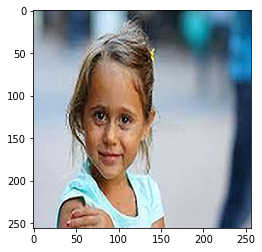

In [ ]:
for i in range(len(low_img)):
  predicted = final_model.predict(low_img[i].reshape(1,SIZE, SIZE,3))
  print(type(predicted))
  #predicted = np.reshape(256,256,3)
  plt.imshow(np.squeeze(predicted))